<a href="https://colab.research.google.com/github/Shoaib3786/Control-Systems/blob/main/practice_stanley_controller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stanley Controller for Car-Like Robots
This notebook simulates the Stanley controller for tracking a circular reference path.
It demonstrates both theory and implementation with animation.

---


## Theory

The **Stanley controller** is used for path tracking in car-like robots.
It minimizes:
- **Heading error** between the robot's orientation and path tangent
- **Cross-track error** (perpendicular distance from front axle to reference path)

### Control Law:

$
\delta = \theta_p - \theta + \arctan\left(\frac{k e}{v}\right)
$

Where:
- $ \theta $: vehicle heading  
- $ \theta_p $: path heading  
- $ e $: cross-track error  
- $ k $: control gain  
- $ v $: vehicle speed

This method is widely used in autonomous driving (e.g., in the ROS navigation stack).


## Stanley Controller: Background

This section describes the core logic behind the Stanley controller, which is a geometric method for lateral control of car-like mobile robots.

### Objective

The Stanley controller aims to reduce two types of error:
1. **Heading error**: the difference between the vehicle's heading and the tangent to the reference path at the closest point.
2. **Cross-track error**: the perpendicular distance between the vehicle’s front axle and the reference path.

The controller computes a steering angle \( \delta \) that accounts for both:

$
\delta = \alpha + \arctan\left(\frac{k \cdot e}{v}\right)
$

where:
- $ \alpha = \theta_p - \theta $: heading error (desired heading minus current heading),
- $ e $: signed cross-track error,
- $ v $: vehicle forward speed,
- $ k $: positive gain constant (Stanley gain).

The steering angle $ \delta $ is then used to update the robot’s orientation via a simple bicycle model.

---

### Reference Path

The reference trajectory is defined as a sequence of waypoints:
$
\{(x_i^{\text{ref}}, y_i^{\text{ref}})\},\quad i = 0, \dots, N
$

At each time step, the controller must:
1. Identify the closest reference point ahead of the robot (not necessarily the nearest one in Euclidean distance).
2. Compute the errors relative to that point.
3. Apply the control law.

---

### Cross-Track Error

The cross-track error $ e $ is the perpendicular distance from the vehicle’s front axle position to the reference path. It can be computed using the 2D cross product:

Let:
- $ (x, y) $: vehicle’s rear axle position,
- $ \theta $: vehicle heading,
- $ L $: wheelbase length,
- $ (f_x, f_y) = (x + L \cos(\theta), y + L \sin(\theta)) $: front axle position,
- $ (x_p, y_p) $: closest reference point,
- $ \vec{r} = [f_x - x_p, f_y - y_p] $: vector from reference to front axle,
- $ \vec{t} = [\cos(\theta_p), \sin(\theta_p)] $: unit tangent at reference point.

Then:
$
e = \vec{t} \times \vec{r}
$
which in 2D is equivalent to:
$
e = t_x r_y - t_y r_x
$

This gives a signed value: positive means the front axle is to the left of the reference path direction, and negative means it is to the right.

---

### Heading Error

The heading error $ \alpha $ is:
$
\alpha = \theta_p - \theta
$
It should be normalized to the interval $ (-\pi, \pi] $.

---

### Stanley Control Law

Combine the heading and cross-track errors using the Stanley control law:

$
\delta = \alpha + \arctan\left(\frac{k \cdot e}{v}\right)
$

A gain $ k > 0 $ determines how aggressively the robot corrects lateral error. Higher \( k \) reduces steady-state cross-track error but may introduce oscillations.

---

### Vehicle Kinematics

We use a simplified kinematic bicycle model:

$
\begin{aligned}
x_{k+1} &= x_k + v \cos(\theta_k) \Delta t \\
y_{k+1} &= y_k + v \sin(\theta_k) \Delta t \\
\theta_{k+1} &= \theta_k + \frac{v}{L} \tan(\delta_k) \Delta t
\end{aligned}
$

---

### Summary of Required Steps

1. **Find the closest reference point ahead of the vehicle** using forward projection (dot product with velocity direction).
2. **Compute the cross-track error** using the 2D cross product.
3. **Compute the heading error** and normalize it.
4. **Apply the Stanley control law** to compute the steering angle.
5. **Update the robot's state** using the kinematic model.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Simulation parameters
dt = 0.1
total_time = 150.0
k = Nan       # Stanley gain
L = 1.0       # Wheelbase
v = NaN       # Constant velocity


In [ ]:
# Circular reference circular trajectory
t_vals = # use np.linspace to generate waypoints
ref_x = # Complete
ref_y = # Complete
ref_yaw = # Complete


In [ ]:
# Initial conditions
x = NaN
y = NaN
yaw = NaN

x_history = [x]
y_history = [y]
yaw_history = [yaw]


In [ ]:
def normalize_angle(angle):
    while angle > np.pi:
        angle -= 2.0 * np.pi
    while angle < -np.pi:
        angle += 2.0 * np.pi
    return angle

In [ ]:
# TODO: Implement Stanley controller loop

for _ in range(len(t_vals)):
    # TODO: Find the closest point ahead of the robot
    # Use forward projection condition: dot product > 0
    # idx = ...

    # TODO: Compute cross-track error
    # fx = ...
    # fy = ...
    # dx = ...
    # dy = ...
    # ref_vec = ...
    # cross_track_error = ...

    # TODO: Compute heading error
    # heading_error = ...

    # TODO: Stanley control law
    # delta = ...

    # TODO: Motion model
    # x += ...
    # y += ...
    # yaw += ...
    # yaw = normalize_angle(yaw)

    x_history.append(x)
    y_history.append(y)
    yaw_history.append(yaw)



NameError: name 't_vals' is not defined

<ipython-input-111-8d5cc242bb25>:27: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  cte = np.cross(ref_vec, np.array([dx, dy]))


Text(0.5, 1.0, 'Tracking error over time')

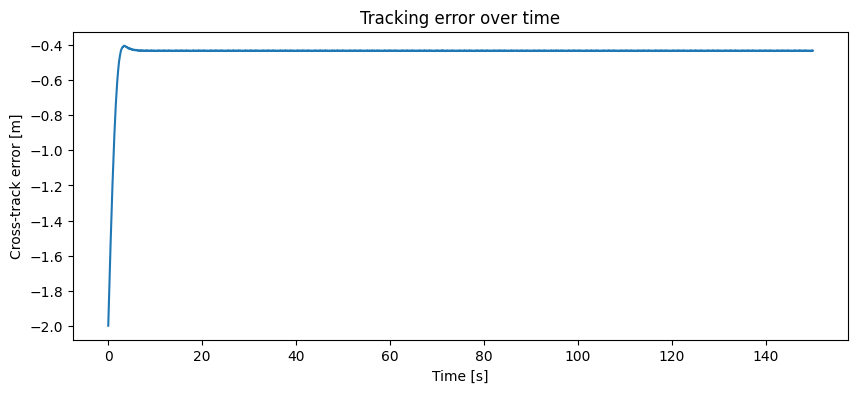

In [ ]:
# Error plotting
cross_track_errors = []

for i in range(len(x_history)):
    x = x_history[i]
    y = y_history[i]
    yaw = yaw_history[i]

    # Find closest point
    min_dist = float('inf')
    idx = 0
    for j in range(len(ref_x)):
        dx = NaN # Complete: error_x
        dy = NaN # Complete: error_y
        dist = NaN # Complete
        forward_proj = # Complete
        if dist < min_dist and forward_proj > 0:
            min_dist = # Complete
            idx = # Complete

    # Cross track error
    fx = NaN # Complete
    fy = NaN # Complete
    dx = NaN # Complete
    dy = NaN # Complete
    ref_vec = NaN # Complete
    cte = NaN # Complete

    cross_track_errors.append(cte)

# Error plot
plt.figure(figsize=(10, 4))
plt.plot(np.arange(len(cross_track_errors)) * dt, cross_track_errors, label="Cross-track error e(t)")
plt.xlabel("Time [s]")
plt.ylabel("Cross-track error [m]")
plt.title("Tracking error over time")


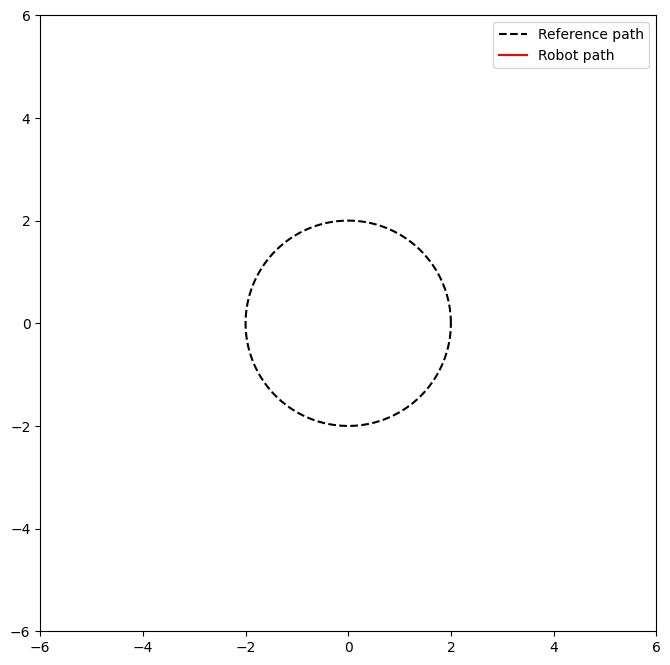

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(ref_x, ref_y, 'k--', label="Reference path")
robot_path, = ax.plot([], [], 'r-', label="Robot path")
robot_dot, = ax.plot([], [], 'ro')
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_aspect('equal')
ax.legend()

def update(frame):
    if frame < 2:
        robot_path.set_data([], [])
        robot_dot.set_data([], [])
    else:
        robot_path.set_data(x_history[:frame], y_history[:frame])
        robot_dot.set_data([x_history[frame]], [y_history[frame]])
    return robot_path, robot_dot

anim = animation.FuncAnimation(fig, update, frames=len(x_history), interval=50)
HTML(anim.to_html5_video())
